# Netflix DataSet Visualization

Data from: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast
import  random

In [11]:
titles = pd.read_csv('../titles.csv')
credits = pd.read_csv('../credits.csv')

In [12]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [17]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

## Understanding the data

The data set has two files:
* Titles:  has all the shows on Netflix
* Credits: has the cast of each show

**Titles:** this dataset has 5850 entries of different shows on netflix with features containing their information such as:

id

title

type

description

release_date

age_certification	

runtime	

genres	

production_countries	

seasons	

imdb_id	

imdb_score	

imdb_votes	

tmdb_popularity	

tmdb_score

**Credits:** this dataset has 77801 entries of different casts 

person_id	

id	

name	

character	

role

In [18]:
titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


Let's see if there is any missing or duplicate data

In [20]:
titles.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

In [21]:
credits.isna().sum()

person_id       0
id              0
name            0
character    9772
role            0
dtype: int64

In [22]:
titles.duplicated().sum()

0

In [23]:
credits.duplicated().sum()

0

In [24]:
titles.nunique()

id                      5850
title                   5798
type                       2
description             5829
release_year              63
age_certification         11
runtime                  202
genres                  1726
production_countries     452
seasons                   26
imdb_id                 5447
imdb_score                80
imdb_votes              3880
tmdb_popularity         4889
tmdb_score               394
dtype: int64

In [25]:
credits.nunique()

person_id    54589
id            5489
name         54314
character    47274
role             2
dtype: int64

In [31]:
import missingno as msno

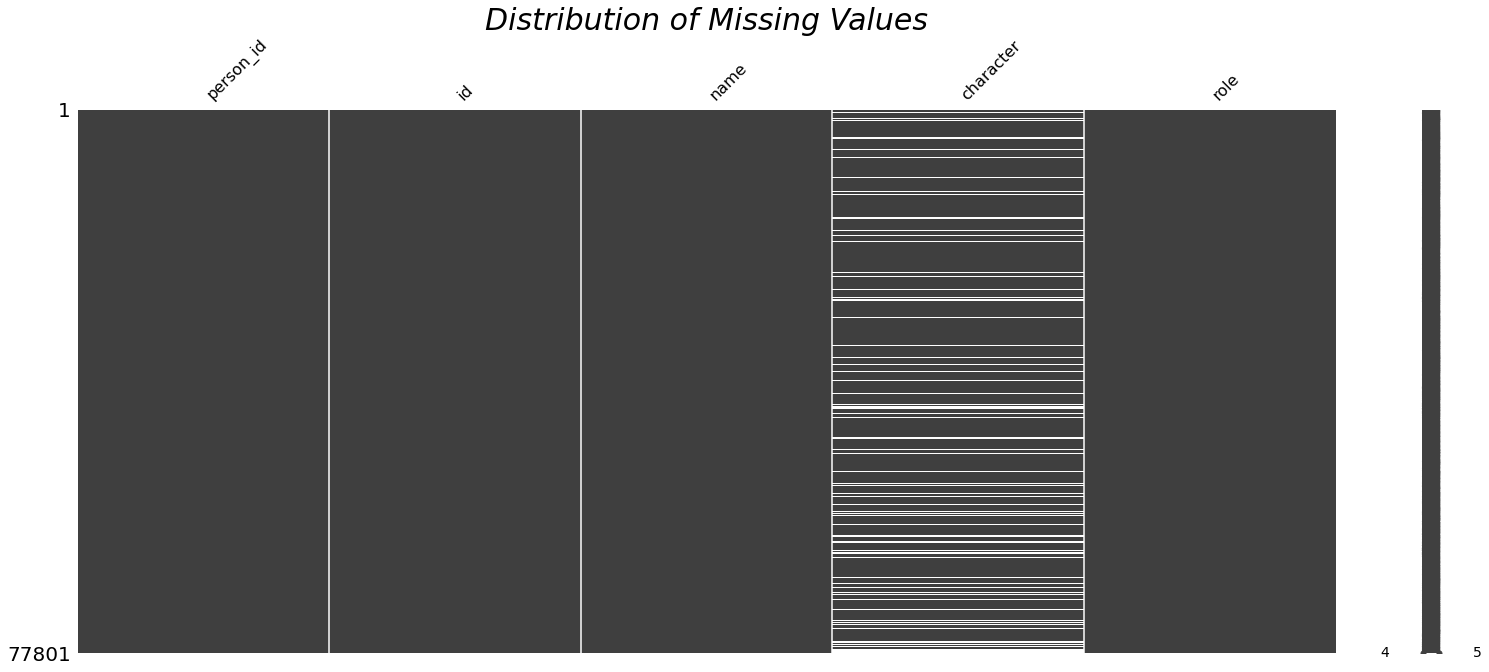

In [32]:
msno.matrix(credits)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique')

In [35]:
credits.corr()

,person_id
person_id,1.0


Text(0.5, 1.0, 'Distribution of Missing Values')

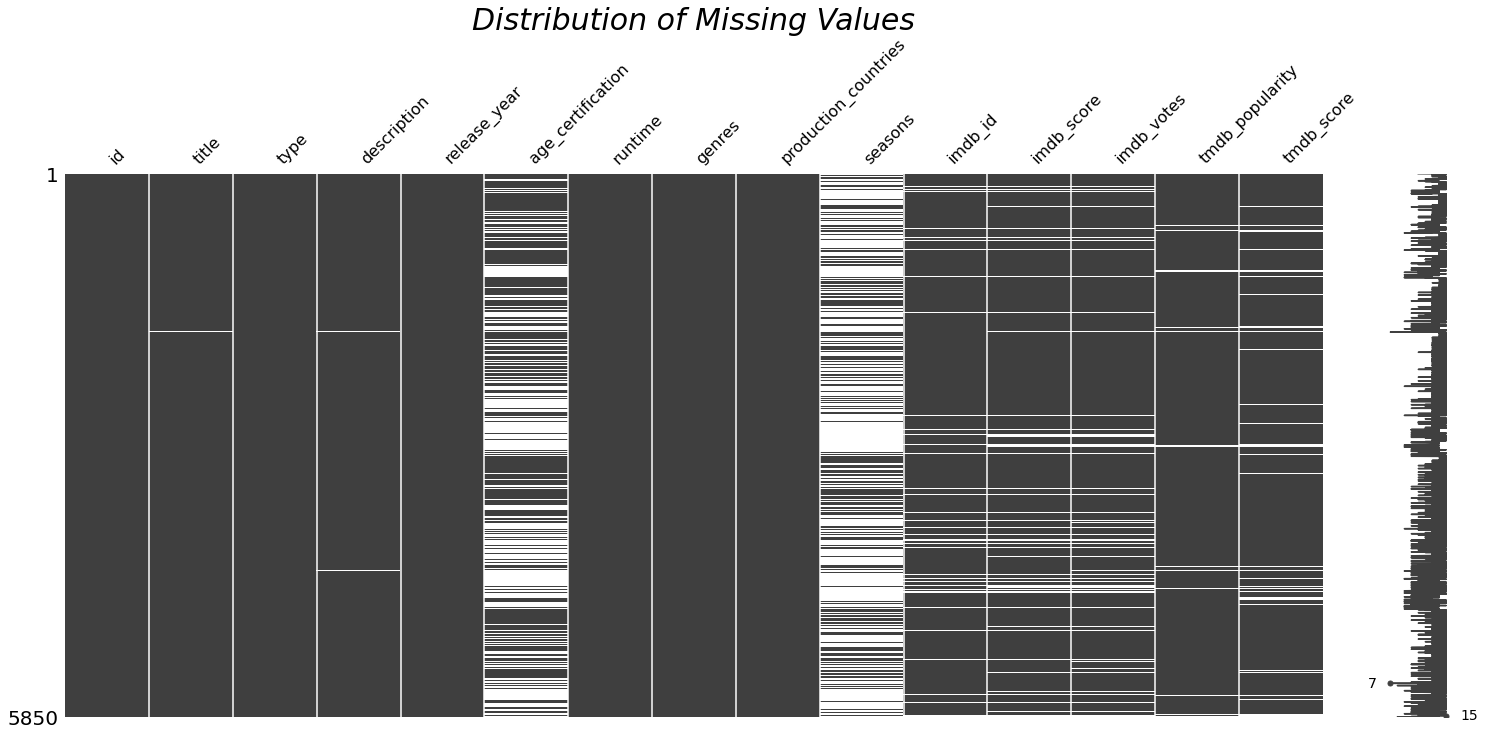

In [33]:
msno.matrix(titles)
plt.title('Distribution of Missing Values', fontsize=30, fontstyle='oblique')

In [36]:
titles.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.173551,-0.504407,-0.129380,-0.208815,0.043244,0.032073
runtime,-0.173551,1.000000,-0.139642,-0.148068,0.139760,0.002545,-0.277454
seasons,-0.504407,-0.139642,1.000000,0.106806,0.206079,0.168051,0.044023
imdb_score,-0.129380,-0.148068,0.106806,1.000000,0.190661,0.017675,0.570754
imdb_votes,-0.208815,0.139760,0.206079,0.190661,1.000000,0.209763,0.112960
tmdb_popularity,0.043244,0.002545,0.168051,0.017675,0.209763,1.000000,0.071894
tmdb_score,0.032073,-0.277454,0.044023,0.570754,0.112960,0.071894,1.000000


## Visualization

<AxesSubplot:xlabel='type', ylabel='count'>

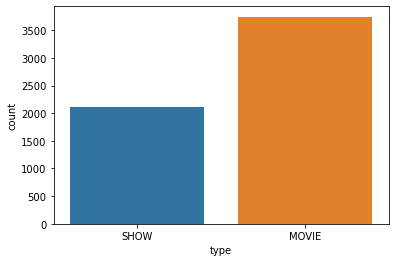

In [26]:
sns.countplot(data=titles,x="type")

<AxesSubplot:xlabel='release_year', ylabel='count'>

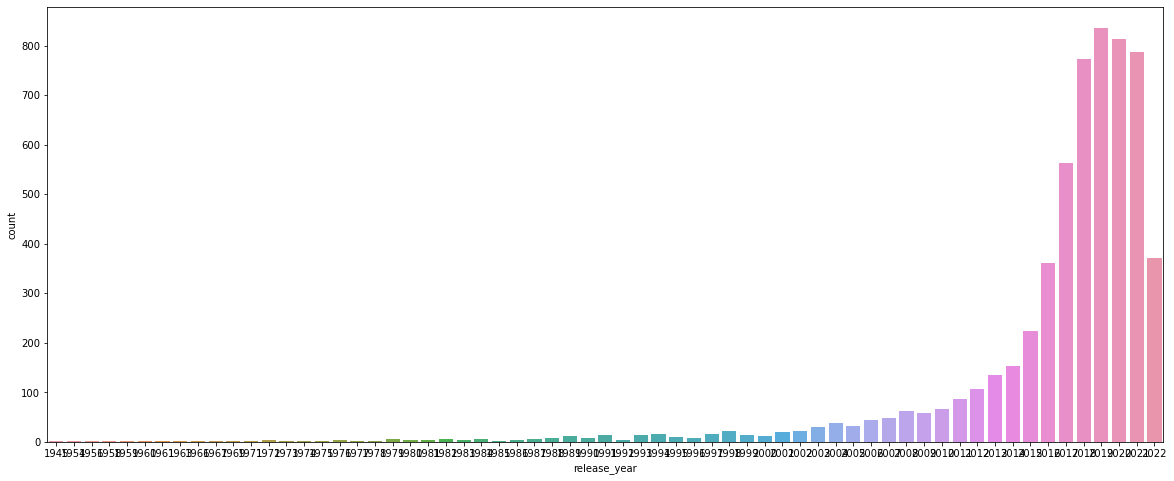

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(data=titles, x="release_year")

<AxesSubplot:xlabel='genres', ylabel='count'>

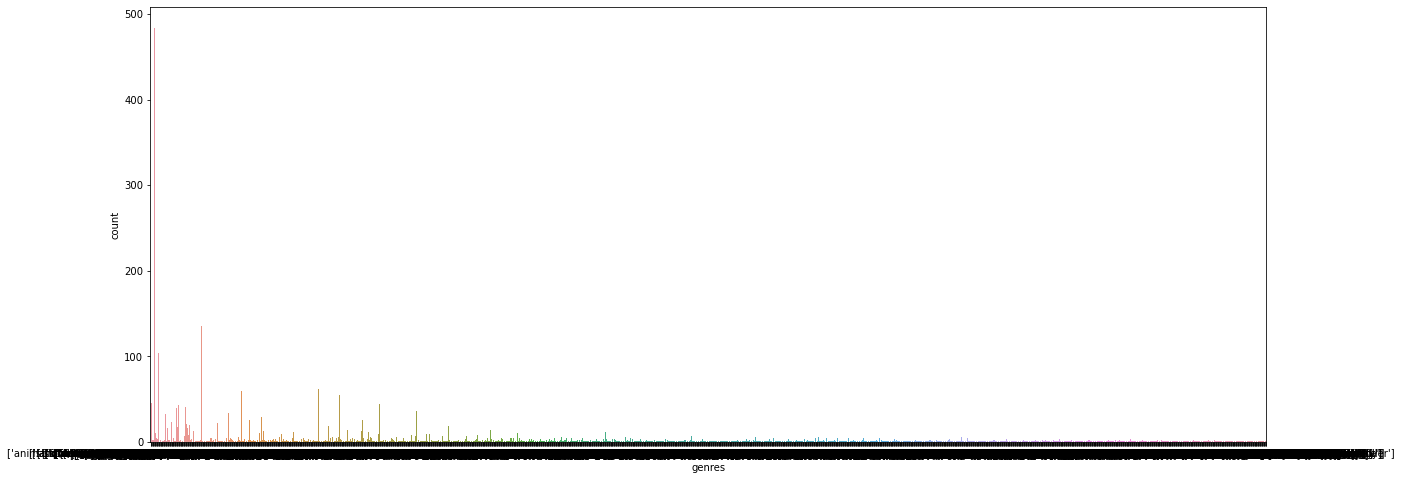

In [40]:
plt.figure(figsize=(20,8))
sns.countplot(data=titles, x= "genres")

In [44]:
def repair_array_bound_categories(arr):
    arr=ast.literal_eval(arr)
    
    if len(arr)==0:
        return np.nan
    
    elif len(arr)==1:
        return arr[0]
    
    else:
        return random.choice(arr)

In [45]:
titles["production_countries"]=titles["production_countries"].apply(repair_array_bound_categories)

titles["genres"]=titles["genres"].apply(repair_array_bound_categories)

<AxesSubplot:xlabel='genres', ylabel='count'>

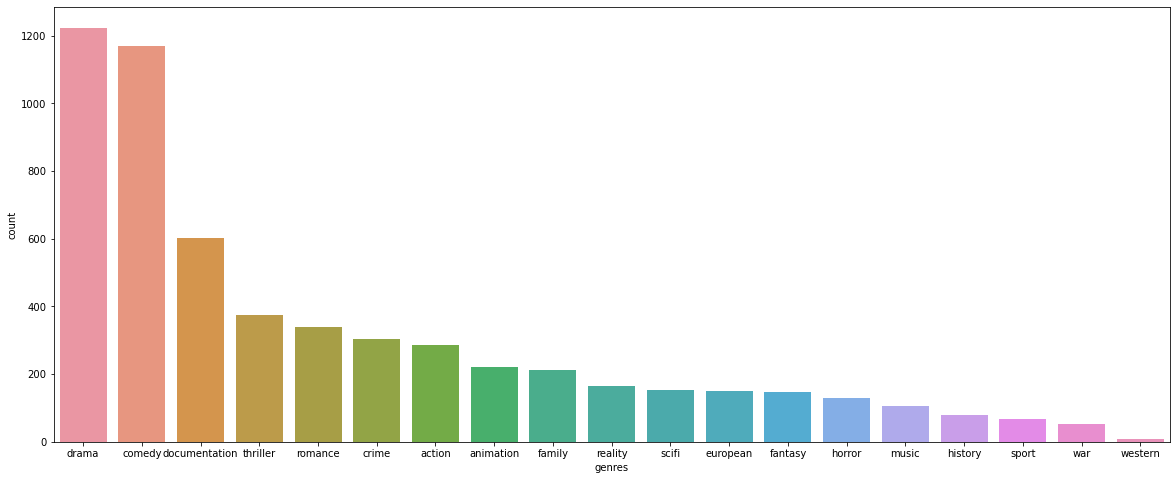

In [50]:
plt.figure(figsize=(20,8))
sns.countplot(data=titles, x= "genres", order = titles['genres'].value_counts().index)

<AxesSubplot:xlabel='age_certification', ylabel='count'>

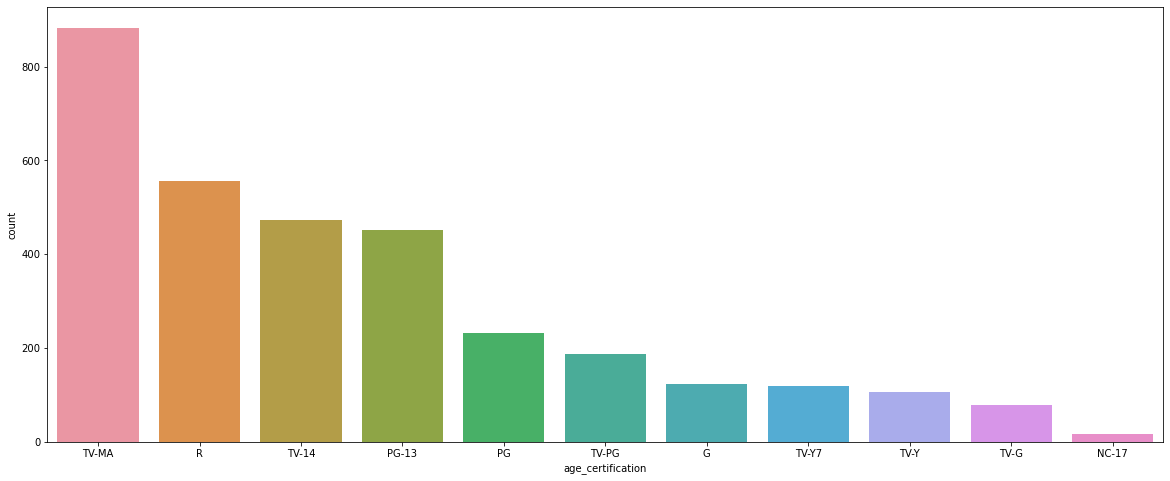

In [49]:
plt.figure(figsize=(20,8))
sns.countplot(data=titles, x= "age_certification", order = titles['age_certification'].value_counts().index)

In [60]:
top10countries = titles['production_countries'].value_counts().head(10)
top10years = titles['release_year'].value_counts().head(10)
top10countries



US    2122
IN     610
GB     299
JP     272
KR     224
ES     177
FR     174
CA     155
MX     110
BR      96
Name: production_countries, dtype: int64

<AxesSubplot:>

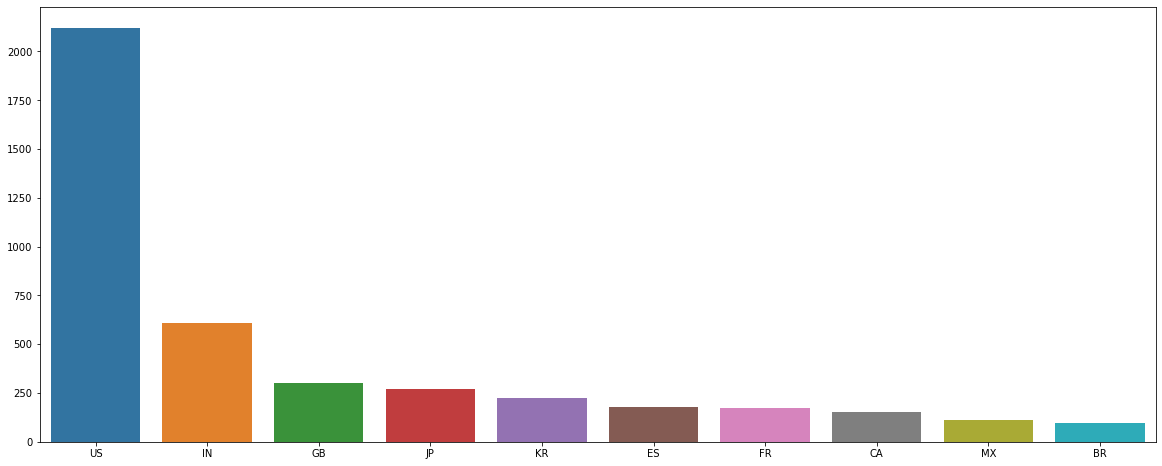

In [73]:
plt.figure(figsize=(20,8))
sns.barplot(y=top10countries.values, x=top10countries.index)

<AxesSubplot:>

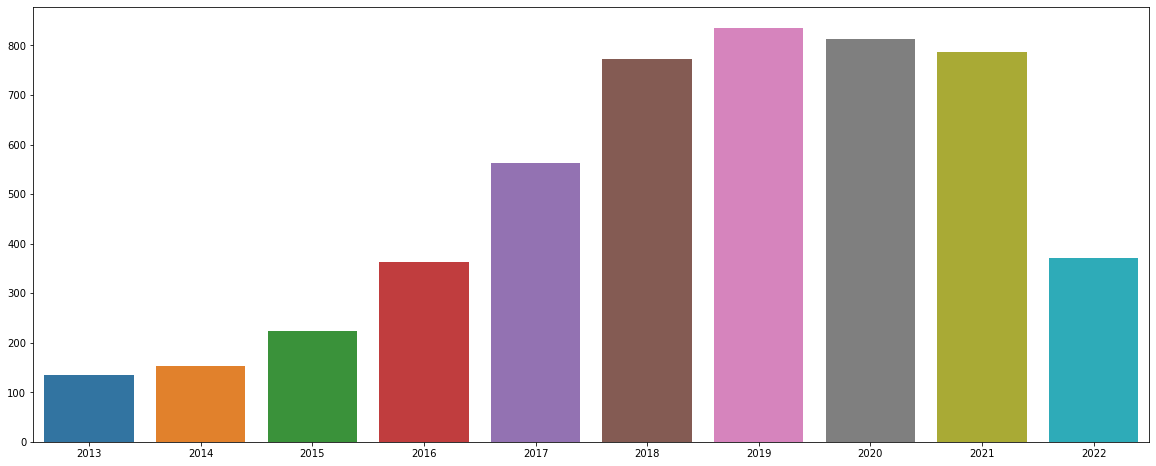

In [74]:
plt.figure(figsize=(20,8))
sns.barplot(y=top10years.values, x=top10years.index)

In [76]:
import country_converter as coco

In [77]:
converted_country=coco.convert(names=titles["production_countries"], to="ISO3")
titles["production_countries"]=converted_country

SU not found in ISO2
nan not found in ISO3
nan not found in ISO3
SU not found in ISO2
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
XX not found in ISO2
nan not found in ISO3
XX not found in ISO2
nan not found in ISO3
XX not found in ISO2
XX not found in ISO2
XX not found in ISO2
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
XX not found in ISO2
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
XX not found in ISO2
nan not found in ISO3
XX not found in ISO2
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
XX not found in ISO2
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3
nan not found in ISO3

In [78]:
import plotly.express as px

country=titles["production_countries"].value_counts()
fig=px.choropleth(locations=country.index,
                  color=country.values,
                  color_continuous_scale=px.colors.sequential.dense,
                  template='plotly_dark',
                  title='Distribution of film production by countries')

fig.update_layout(font=dict(size=17, family="Franklin Gothic"))
fig.show()

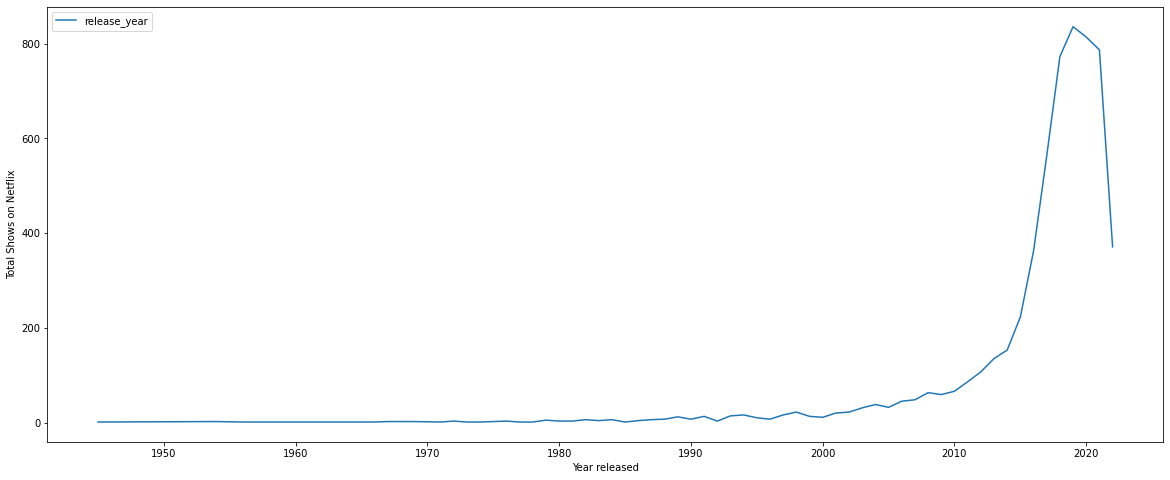

In [85]:
release_year_count=titles['release_year'].value_counts()
release_year_count=pd.DataFrame(release_year_count)

plt.figure(figsize=(20, 8))
sns.lineplot(data=release_year_count)
plt.xlabel('Year released')
plt.ylabel('Total Shows on Netflix')
plt.show()